In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [5]:
data.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
data.shape

(614, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [9]:
data1 = lab_enc.fit_transform(data['Loan_ID'])
data2 = lab_enc.fit_transform(data['Gender'])
data3 = lab_enc.fit_transform(data['Married'])
data4 = lab_enc.fit_transform(data['Dependents'])
data5 = lab_enc.fit_transform(data['Education'])
data6 = lab_enc.fit_transform(data['Self_Employed'])
data7 = lab_enc.fit_transform(data['Property_Area'])
data8 = lab_enc.fit_transform(data['Loan_Status'])

In [10]:
data['Loan_ID'] = data1
data['Gender'] = data2
data['Married'] = data3
data['Dependents'] = data4
data['Education'] = data5
data['Self_Employed'] = data6
data['Property_Area'] = data7
data['Loan_Status'] = data8

In [11]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [12]:
data.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mode()[0])

In [14]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
data.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.838762,0.657980,0.842020,0.218241,0.237785,5403.459283,1621.245798,146.412162,342.410423,0.855049,1.037459,0.687296
std,177.390811,0.421752,0.484971,1.120531,0.413389,0.534737,6109.041673,2926.248369,84.037468,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,2.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,2.000000,2.000000,4.000000,1.000000,2.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


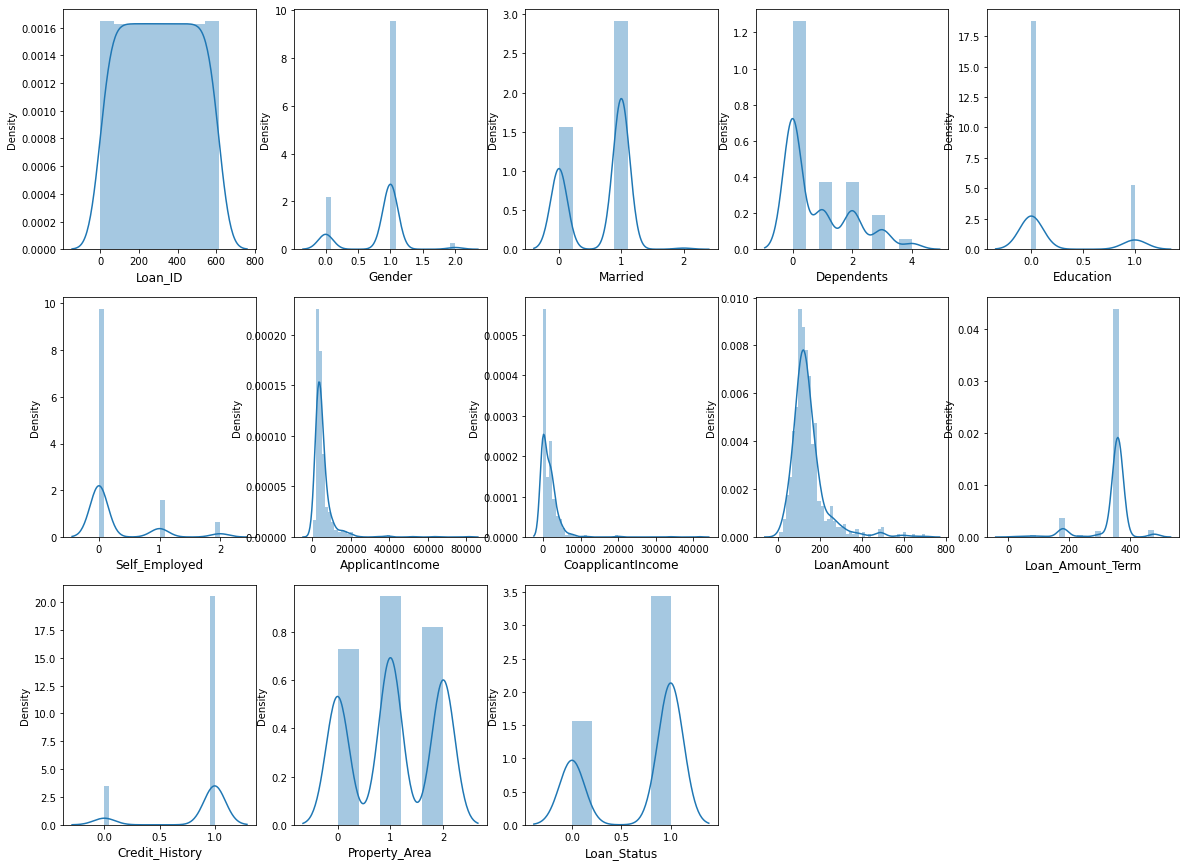

In [16]:
plt.figure(figsize = [20,15])
plotno = 1


for column in data:
    if plotno<=15:
        ax = plt.subplot(3,5,plotno)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
        
    plotno+=1
    
    
plt.show()    

In [17]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

In [18]:
applicantIncome_low = (q1.ApplicantIncome-(1.5*iqr.ApplicantIncome))
index = np.where(data['ApplicantIncome']<applicantIncome_low)
data = data.drop(data.index[index])
data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [19]:
applicantIncome_high = (q1.ApplicantIncome+(1.5*iqr.ApplicantIncome))
index = np.where(data['ApplicantIncome']>applicantIncome_high)
data = data.drop(data.index[index])
data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,607,607,1,1,2,1,0,3987,1411.0,157.000000,360.0,1.0,0,1
513,608,608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
514,609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
515,610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1


In [20]:
coapplicantIncome_low = (q1.CoapplicantIncome-(1.5*iqr.CoapplicantIncome))
index = np.where(data['CoapplicantIncome']<coapplicantIncome_low)
data = data.drop(data.index[index])
data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,607,607,1,1,2,1,0,3987,1411.0,157.000000,360.0,1.0,0,1
513,608,608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
514,609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
515,610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1


In [21]:
coapplicantIncome_high = (q1.CoapplicantIncome+(1.5*iqr.CoapplicantIncome))
index = np.where(data['CoapplicantIncome']>coapplicantIncome_high)
data = data.drop(data.index[index])
data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,607,607,1,1,2,1,0,3987,1411.0,157.000000,360.0,1.0,0,1
451,608,608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
452,609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
453,610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1


In [22]:
loanAmount_low = (q1.LoanAmount-(1.5*iqr.LoanAmount))
index = np.where(data['LoanAmount']<loanAmount_low)
data = data.drop(data.index[index])
data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450,607,607,1,1,2,1,0,3987,1411.0,157.000000,360.0,1.0,0,1
451,608,608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
452,609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
453,610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1


In [23]:
loanAmount_high = (q1.LoanAmount+(1.5*iqr.LoanAmount))
index = np.where(data['LoanAmount']>loanAmount_high)
data = data.drop(data.index[index])
data.reset_index()

,index,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
435,607,607,1,1,2,1,0,3987,1411.0,157.000000,360.0,1.0,0,1
436,608,608,1,1,0,0,0,3232,1950.0,108.000000,360.0,1.0,0,1
437,609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
438,610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1


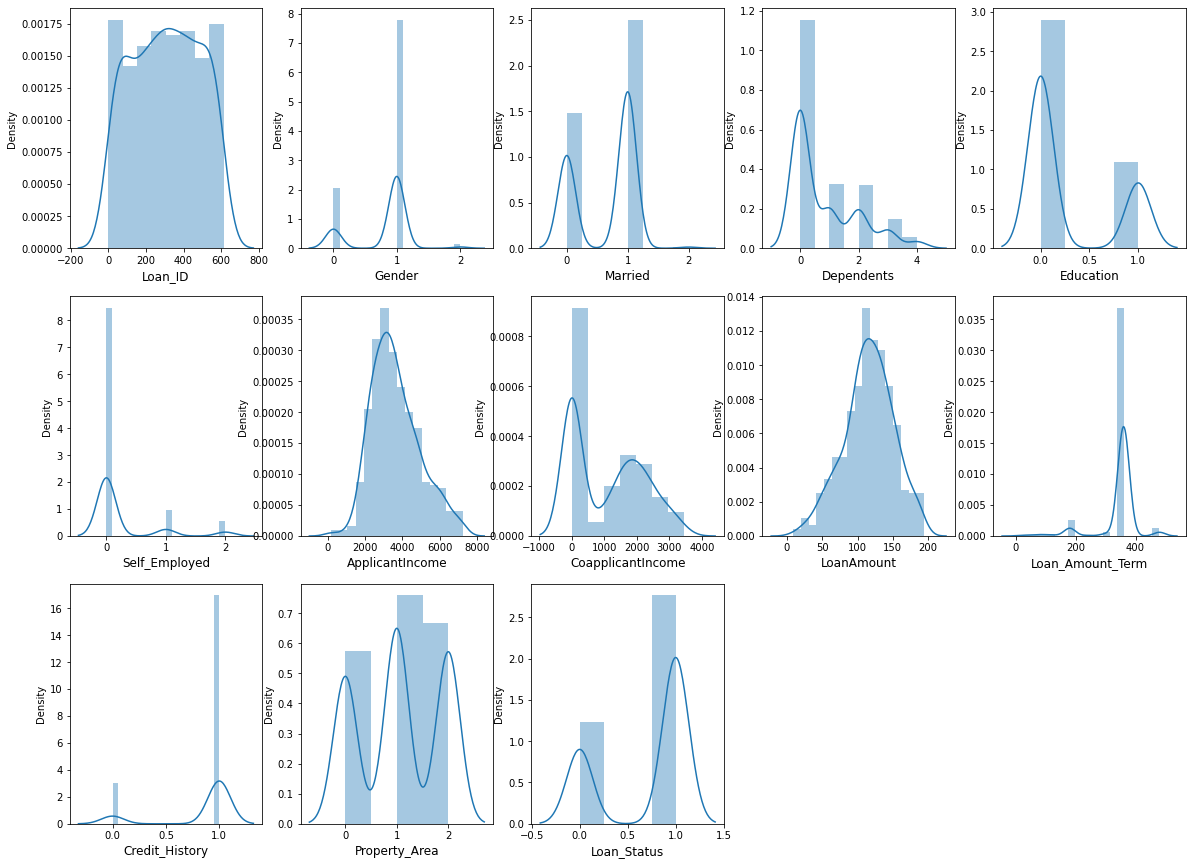

In [24]:
plt.figure(figsize = [20,15])
plotno = 1


for column in data:
    if plotno<=15:
        ax = plt.subplot(3,5,plotno)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=12)
        
    plotno+=1
    
    
plt.show()    

In [25]:
data.shape

(440, 13)

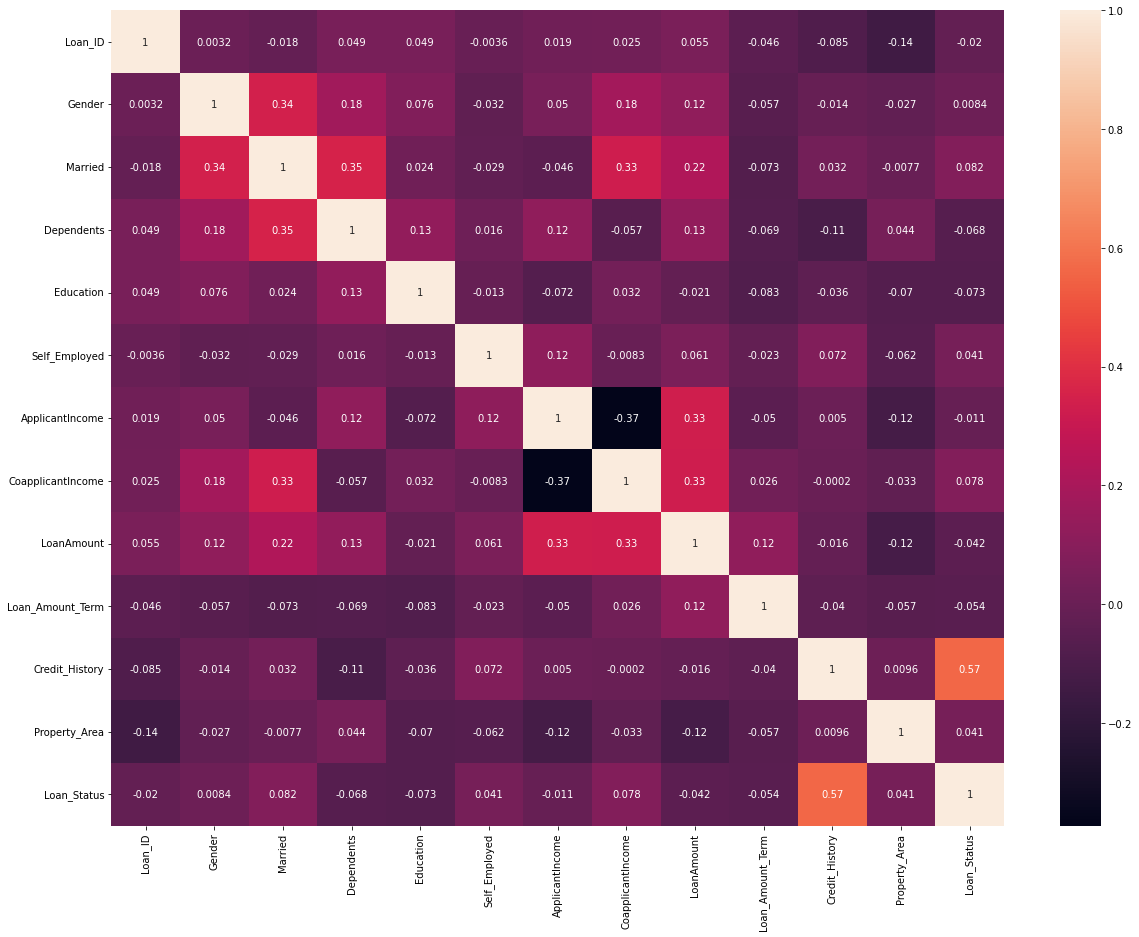

In [26]:
corr = data.corr()

plt.figure(figsize = (20,15))
sns.heatmap(corr,annot = True)
plt.show()

In [27]:
x = data.drop(columns = ['Loan_Status'])
y = data.Loan_Status

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
x_scaled = scaler.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.25,random_state=5)

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
lr = LogisticRegression()

In [35]:
lr.fit(x_train,y_train)

LogisticRegression()

In [36]:
data.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1


In [37]:
print('Loan_Status :',lr.predict(scaler.transform([[0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2]])))

Loan_Status : [1]


In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
y_pred = lr.predict(x_test)

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.57      0.71        35
           1       0.83      0.99      0.90        75

    accuracy                           0.85       110
   macro avg       0.89      0.78      0.81       110
weighted avg       0.87      0.85      0.84       110



In [41]:
print(confusion_matrix(y_test,y_pred))

[[20 15]
 [ 1 74]]


In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [45]:
y_pred = knn.predict(x_test)

In [46]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.46      0.57        35
           1       0.79      0.93      0.85        75

    accuracy                           0.78       110
   macro avg       0.77      0.70      0.71       110
weighted avg       0.78      0.78      0.76       110



In [47]:
print(confusion_matrix(y_test,y_pred))

[[16 19]
 [ 5 70]]


In [48]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
y_pred = dt.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.59      0.69      0.63        35
           1       0.84      0.77      0.81        75

    accuracy                           0.75       110
   macro avg       0.71      0.73      0.72       110
weighted avg       0.76      0.75      0.75       110



In [50]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [51]:
y_pred = rf.predict(x_test)

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.57      0.67        35
           1       0.82      0.93      0.87        75

    accuracy                           0.82       110
   macro avg       0.81      0.75      0.77       110
weighted avg       0.82      0.82      0.81       110



In [53]:
### logistic regression is the best model for this dataset beacuse it's give the best prediction

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
param_grid = {'C': [ 0.01, 0.1, 1, 10] }

In [56]:
gsc = GridSearchCV(estimator=lr,param_grid=param_grid)

In [57]:
gsc.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10]})

In [58]:
gsc.best_params_

{'C': 1}

In [59]:
lr = LogisticRegression(C= 1)

In [60]:
 lr.fit(x_train,y_train)

LogisticRegression(C=1)

In [61]:
y_pred = lr.predict(x_test)

In [62]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.57      0.71        35
           1       0.83      0.99      0.90        75

    accuracy                           0.85       110
   macro avg       0.89      0.78      0.81       110
weighted avg       0.87      0.85      0.84       110



In [63]:
print(confusion_matrix(y_test,y_pred))

[[20 15]
 [ 1 74]]
